# Part - A

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

In [35]:
c = pd.read_csv('CocaCola_Sales_Rawdata.csv')
c

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [36]:
#To find whether there are any existing null values or not
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [37]:
#Count of duplicated rows
c[c.duplicated()]

,Quarter,Sales


<AxesSubplot:>

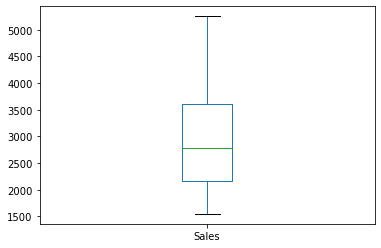

In [38]:
#Outlier Detection
c.plot(kind='box')

<AxesSubplot:>

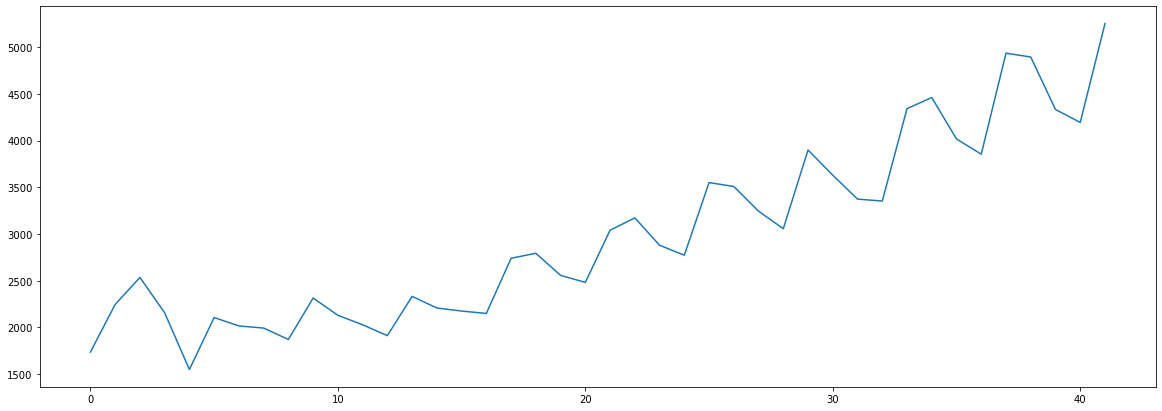

In [39]:
fig= plt.figure(figsize=(20,7))
c.Sales.plot()

In [40]:
quarter=['Q1','Q2','Q3','Q4']
n=c['Quarter'][0]
n[0:41]

'Q1_86'

In [41]:
c['quarter']=0

In [42]:
for i in range(42):
    n=c['Quarter'][i]
    c['quarter'][i]=n[0:2]

<ipython-input-42-4e5202809d2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['quarter'][i]=n[0:2]
C:\Users\G Saarika\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [43]:
dummy=pd.DataFrame(pd.get_dummies(c['quarter']))

In [44]:
coco=pd.concat((c,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']

In [45]:
log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

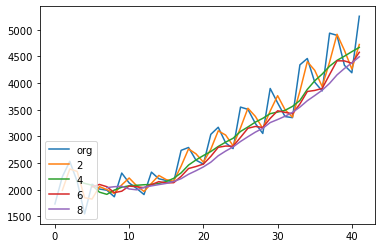

In [46]:
# moving average for the time series to understand better about the trend character
c.Sales.plot(label="org")
for i in range(2,10,2):
    c["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

# Splitting Data

<AxesSubplot:>

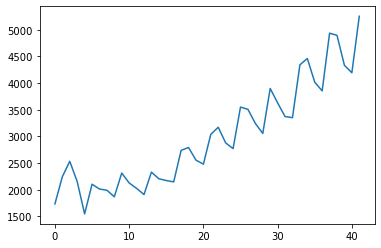

In [47]:
train= coco.head(38)
test=coco.tail(4)
coco.Sales.plot()

# linear model

In [48]:
linear= smf.ols('Sales~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

421.1787876367787

# quadratic model

In [49]:
quad=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

475.56183519820354

# exponential model

In [50]:
expo=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.2479731321014

# additive seasonality

In [51]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1860.0238154374442

# additive seasonality with linear trend

In [52]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

38    4292.265126
39    4066.761792
40    3961.769195
41    4639.214094
dtype: float64

In [53]:
rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

464.98290242803927

# additive seasonality with quadratic trend

In [54]:
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

301.7380072146153

# multiplicative seasonality

In [55]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1963.3896400563408

# multiplicative seasonality with linear trend

In [56]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

225.52439056169126

# multiplicative seasonality with quadratic trend

In [57]:
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457189234895

In [58]:
#Compare the results 
data={"MODEL":pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
data
Rmse=pd.DataFrame(data)
Rmse

,MODEL,Values
0,rmse_mul_quad,581.845719
1,rmseadd,1860.023815
2,rmseaddlinear,464.982902
3,rmseaddquad,301.738007
4,rmseexpo,466.247973
5,rmselin,421.178788
6,rmsemul,1963.389640
7,rmsemulin,225.524391
8,rmsequad,475.561835


In [59]:
coco

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [60]:
cocos = coco.drop(['Quarter','quarter','t_square'],axis=1)
cocos                 

,Sales,Q1,Q2,Q3,Q4,t,log_Sales
0,1734.827000,1,0,0,0,1,7.458663
1,2244.960999,0,1,0,0,2,7.716443
2,2533.804993,0,0,1,0,3,7.837477
3,2154.962997,0,0,0,1,4,7.675529
4,1547.818996,1,0,0,0,5,7.344602
5,2104.411995,0,1,0,0,6,7.651791
6,2014.362999,0,0,1,0,7,7.608058
7,1991.746998,0,0,0,1,8,7.596767
8,1869.049999,1,0,0,0,9,7.533186
9,2313.631996,0,1,0,0,10,7.746574


In [61]:
#final model with least rmse value
final= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=cocos).fit()
pred= pd.Series(final.predict(coco))
actual_pred = pred
actual_pred

0     1169.498984
1     1881.630710
2     1820.494721
3     1561.341721
4     1461.409224
5     2173.540950
6     2112.404961
7     1853.251960
8     1753.319463
9     2465.451189
10    2404.315200
11    2145.162199
12    2045.229702
13    2757.361428
14    2696.225439
15    2437.072439
16    2337.139942
17    3049.271668
18    2988.135679
19    2728.982678
20    2629.050181
21    3341.181907
22    3280.045918
23    3020.892917
24    2920.960420
25    3633.092146
26    3571.956157
27    3312.803157
28    3212.870660
29    3925.002386
30    3863.866397
31    3604.713396
32    3504.780899
33    4216.912625
34    4155.776636
35    3896.623635
36    3796.691138
37    4508.822864
38    4447.686875
39    4188.533875
40    4088.601378
41    4800.733104
dtype: float64

In [62]:
coco["actual_pred"] = pd.Series(actual_pred)
coco

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,actual_pred
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,1169.498984
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,1881.630710
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,1820.494721
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,1561.341721
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,1461.409224
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,2173.540950
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,2112.404961
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,1853.251960
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,1753.319463
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,2465.451189


# Part - B

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

In [64]:
a = pd.read_csv('Airlines+Data.csv')
a

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [65]:
#To find whether there are any existing null values or not
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [66]:
#Count of duplicated rows
a[a.duplicated()]

,Month,Passengers


<AxesSubplot:>

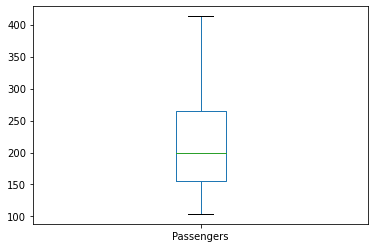

In [67]:
#Outlier Detection
a.plot(kind='box')

<AxesSubplot:>

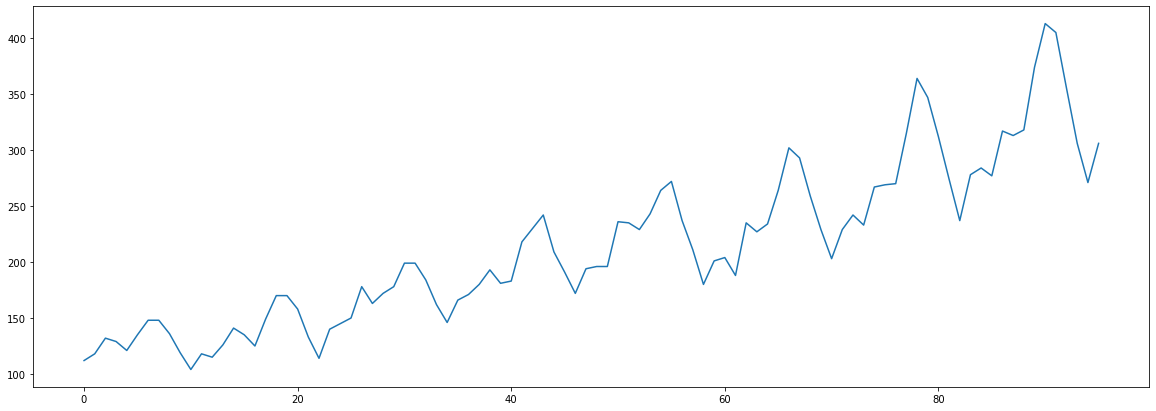

In [68]:
fig= plt.figure(figsize=(20,7))
a.Passengers.plot()

In [69]:
a["Date"] = pd.to_datetime(a.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 
a["month"] = a.Date.dt.strftime("%b") # month extraction
a["year"] = a.Date.dt.strftime("%Y") # year extraction

#Walmart["Day"] = Walmart.Date.dt.strftime("%d") # Day extraction
#Walmart["wkday"] = Walmart.Date.dt.strftime("%A") # weekday extraction

<AxesSubplot:xlabel='month', ylabel='year'>

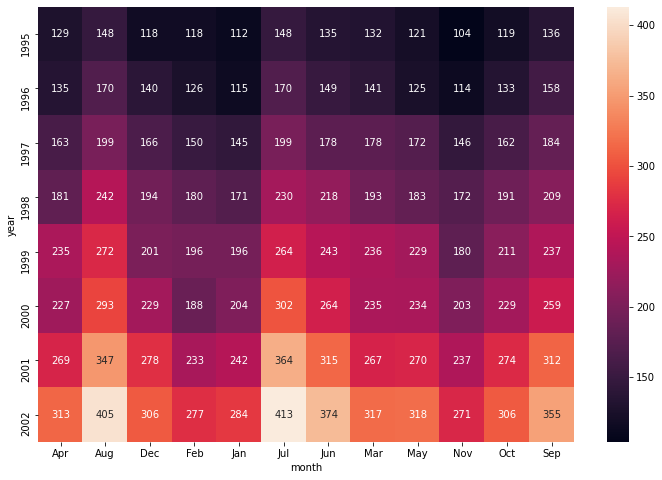

In [70]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=a,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

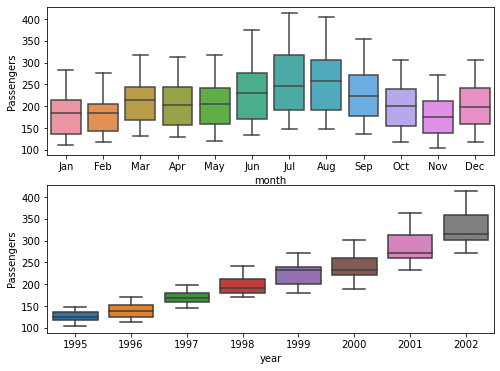

In [71]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=a)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=a)

<ipython-input-72-762e9df0235c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['months'][i]= p[0:3]
C:\Users\G Saarika\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:>

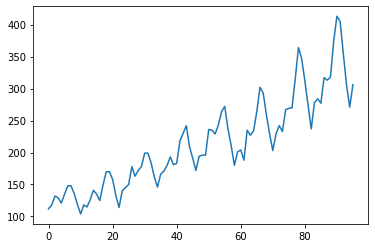

In [72]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
import numpy as np
p = a["Month"][0]
p[0:3]
a['months']= 0

for i in range(96):
    p = a["Month"][i]
    a['months'][i]= p[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(a['months']))
a1 = pd.concat([a.Passengers,month_dummies],axis = 1)
t= np.arange(1,97)
a1['t']=t
a1['t_square']=a1['t']*a1['t']
a1.columns
a1["log_Passengers"] = np.log(a1["Passengers"])
a1.rename(columns={"Passengers": 'Passengers'}, inplace=True)
a1.Passengers.plot()


<AxesSubplot:xlabel='year', ylabel='Passengers'>

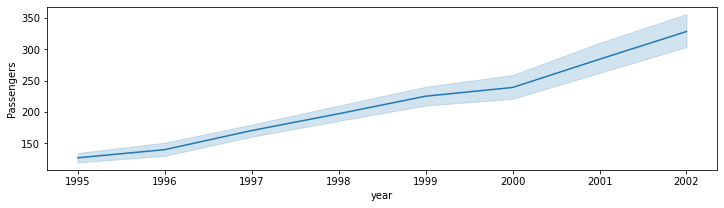

In [73]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=a)

# Splitting data

In [74]:
Train = a1.head(85)
Test =a1.tail(11)

# Linear Model

In [75]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

55.674170015416244

# Exponential

In [76]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

47.95514835724099

# Quadratic 

In [77]:
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

50.6595457765005

# Additive seasonality 

In [78]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

134.34479910432762

# Additive Seasonality Quadratic 

In [79]:
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

27.412714961203232

# Multiplicative Seasonality

In [80]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

141.68850735470016

# Multiplicative Additive Seasonality 

In [81]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.823937118937128

# Compare the results 

In [82]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.823937
4,rmse_add_sea_quad,27.412715
1,rmse_Exp,47.955148
2,rmse_Quad,50.659546
0,rmse_linear,55.674170
3,rmse_add_sea,134.344799
5,rmse_Mult_sea,141.688507


# predict for new time period

In [83]:
a1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [84]:
#Build the model on entire data set
model_full = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=a1).fit()

In [85]:
pred_new  = pd.Series(model_full.predict(a1))
pred_new

0     101.802790
1     100.717631
2     128.632471
3     121.797312
4     120.837153
         ...    
91    371.087153
92    343.797312
93    316.632471
94    292.842631
95    319.427790
Length: 96, dtype: float64

In [86]:
a1["actual_pred"] = pd.Series(pred_new)

In [87]:
a1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,actual_pred
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,101.802790
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,100.717631
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,128.632471
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,121.797312
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,120.837153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,371.087153
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,343.797312
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,316.632471
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119,292.842631
